
<div style="text-align: center;">
    <strong style="display: block; margin-bottom: 10px;">Group ??</strong> 
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Fábio Santos</td>
            <td style="border: 1px solid white; padding: 8px;">2024</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Joana Rodrigues</td>
            <td style="border: 1px solid white; padding: 8px;">20240603</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Mara Simões</td>
            <td style="border: 1px solid white; padding: 8px;">20240326</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Matilde Street</td>
            <td style="border: 1px solid white; padding: 8px;">20240523</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Rafael Borges</td>
            <td style="border: 1px solid white; padding: 8px;">2024</td>
        </tr>
    </table>
</div>

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Imports](#imports)
---

# 1. Imports
## 1.1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap
import mlflow
import logging
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

c:\Users\joana\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.2. Import Dataset

In [2]:
listings = pd.read_csv('Listings_paris.csv', encoding='latin1')
listings.head().T

,0,1,2,3,4
listing_id,281420,3705183,4082273,4797344,4823489
name,"Beautiful Flat in le Village Montmartre, Paris",39 mÃÂÃÂÃÂÃÂ² Paris (Sacre CÃÂÃÂ ÃÂ...,"Lovely apartment with Terrace, 60m2",Cosy studio (close to Eiffel tower),Close to Eiffel Tower - Beautiful flat : 2 rooms
host_id,1466919,10328771,19252768,10668311,24837558
host_since,2011-12-03,2013-11-29,2014-07-31,2013-12-17,2014-12-14
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN
host_is_superhost,f,f,f,f,f
host_total_listings_count,1.0,1.0,1.0,1.0,1.0


# 2. Analysis

## 2.1. Data Description

| Feature                       | Description |
|------------------------------|-------------|
| `listing_id`                 | Unique identifier for each Airbnb listing. |
| `name`                       | Title or name of the Airbnb listing, usually provided by the host. |
| `host_id`                    | Unique identifier for the host who owns the listing. |
| `host_since`                 | Date when the host first joined Airbnb. |
| `host_location`              | Location information of the host. |
| `host_response_time`         | Average time the host takes to respond to inquiries. |
| `host_response_rate`         | Percentage of messages the host responds to. |
| `host_acceptance_rate`       | Percentage of booking requests accepted by the host. |
| `host_is_superhost`          | Whether the host is a Superhost. |
| `host_total_listings_count`  | Total number of listings managed by the host. |
| `host_has_profile_pic`       | Whether the host has uploaded a profile picture. |
| `host_identity_verified`     | Whether the host has verified their identity on Airbnb. |
| `neighbourhood`              | Local neighborhood where the listing is located. |
| `district`                   | District where the listing is located. |
| `city`                       | City where the listing is located. |
| `latitude`                   | Latitude coordinate of the listing. |
| `longitude`                  | Longitude coordinate of the listing. |
| `property_type`              | Type of property listed. |
| `room_type`                  | Type of room offered. |
| `accomodates`                | Maximum number of guests the listing can host. |
| `bedrooms`                   | Number of bedrooms available to guests. |
| `amenities`                  | List of amenities offered. |
| `price`                      | Price per night. |
| `minimum_nights`             | Minimum number of nights required per booking. |
| `maximum_nights`             | Maximum number of nights allowed per booking. |
| `review_scores_rating`       | Overall average rating given by guests. |
| `review_scores_accuracy`     | Rating for how accurate the listing description is. |
| `review_scores_cleanliness`  | Rating for the cleanliness of the listing. |
| `review_scores_checkin`      | Rating for the ease and quality of the check-in process. |
| `review_scores_communication`| Rating for communication with the host. |
| `review_scores_location`     | Rating for the listing's location. |
| `review_scores_value`        | Rating for the value for money. |
| `instant_bookable`           | Whether the listing supports instant booking. |

## 2.2. Data Exploration

In [3]:
print(listings.shape)
print(listings.columns)
print(listings.dtypes)

(47468, 33)
Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')
listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acc

In [4]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,47468.0,2.246937e+07,1.419277e+07,3109.00000,9.342157e+06,2.143567e+07,3.551085e+07,4.809185e+07
host_id,47468.0,6.703185e+07,8.834214e+07,2626.00000,9.618379e+06,2.867929e+07,8.074145e+07,3.871240e+08
host_response_rate,16527.0,8.623350e-01,2.778624e-01,0.00000,8.900000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,23192.0,7.980019e-01,3.087396e-01,0.00000,7.100000e-01,9.700000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,47468.0,8.032569e+00,3.165403e+01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.020000e+02
district,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,47468.0,4.886467e+01,1.827897e-02,48.81317,4.885140e+01,4.886599e+01,4.887962e+01,4.890491e+01
longitude,47468.0,2.347025e+00,3.284368e-02,2.23838,2.326570e+00,2.349650e+00,2.372100e+00,2.461390e+00
accommodates,47468.0,3.044472e+00,1.598496e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,38384.0,1.372447e+00,9.653278e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01


In [5]:
listings.describe(include='object').T

,count,unique,top,freq
name,47417,45009,Charmant studio au coeur de Paris,21
host_since,47468,3705,2013-04-23,257
host_location,47468,1,"Paris, Ile-de-France, France",47468
host_response_time,16527,4,within an hour,8209
host_is_superhost,47468,2,f,41023
host_has_profile_pic,47468,2,t,47366
host_identity_verified,47468,2,t,38209
neighbourhood,47468,20,Buttes-Montmartre,5672
city,47468,1,Paris,47468
property_type,47468,62,Entire apartment,38020


**Data Type Summary:**
* `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, and `instant_bookable` are considered `object`but should  be booleans as they have only 2 unique values.
* `host_since` is a `datetime64`
* `bedrooms` is a `float64` but should be `int` after checking the values.


In [6]:
def missing_summary(df):
    missing_percent = (df.isnull().mean() * 100).round(2)
    missing_count = df.isnull().sum()
    dtypes = df.dtypes
    
    summary = pd.DataFrame({
        'missing_percent': missing_percent,
        'missing_count': missing_count,
        'dtype': dtypes
    })
    
    summary = summary[summary['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    
    print(summary)
    
    missing_value_columns = summary.index.tolist()
    return missing_value_columns


missing_value_columns = missing_summary(listings)

                             missing_percent  missing_count    dtype
district                              100.00          47468  float64
host_response_time                     65.18          30941   object
host_response_rate                     65.18          30941  float64
host_acceptance_rate                   51.14          24276  float64
review_scores_checkin                  22.27          10570  float64
review_scores_location                 22.27          10569  float64
review_scores_value                    22.26          10568  float64
review_scores_accuracy                 22.24          10556  float64
review_scores_communication            22.24          10557  float64
review_scores_cleanliness              22.22          10549  float64
review_scores_rating                   22.16          10520  float64
bedrooms                               19.14           9084  float64
name                                    0.11             51   object


In [7]:
listings.drop(columns=['city', 'host_location', 'district', 'name'], inplace=True)

**Dropped Columns Summary:**

* `city` had only one unique value ("Paris") since the dataset was pre-filtered to focus exclusively on listings in Paris.
* `host_location` also had only one unique value and was therefore redundant for analysis.
* `district` contained only missing (`NaN`) values across all rows (paris doesn't have districts like the USA) making it irrelevant for the current scope of the project.
* `name` has high cardinality, unstructured text format, and lack of relevance for structured analysis.

## 2.3. Function for DataTypes

In [8]:
def identify_data_types(df, info=False):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
    datetime_features = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    
    if info == True:
        print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
        print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
        print(f"Boolean features ({len(boolean_features)}): {boolean_features}")
        print(f"Datetime features ({len(datetime_features)}): {datetime_features}")
    
    return numerical_features, categorical_features, boolean_features, datetime_features

numerical_features, categorical_features, boolean_features, datetime_features = identify_data_types(listings)

## 2.4. Univariate visualizations

### 2.4.1. Numeric Features

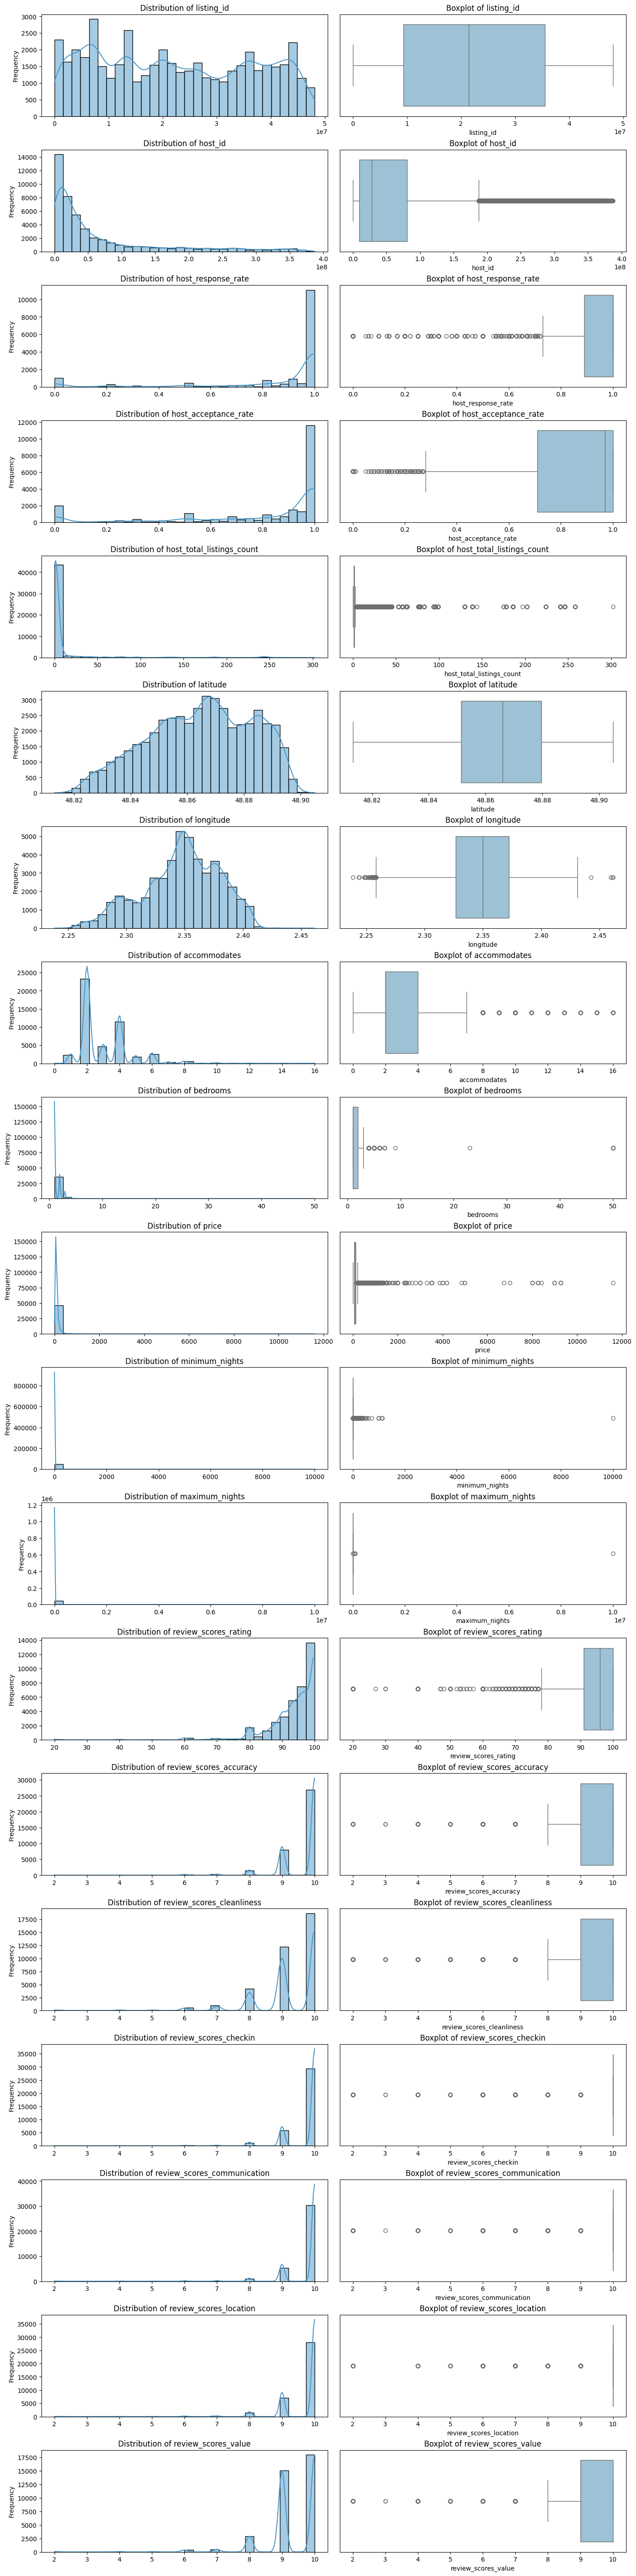

In [9]:
def plot_dists_and_boxes(df, numerical_features, bins=30):
    num_features = len(numerical_features)
    total_rows = num_features * 2
    ncols = 2
    nrows = math.ceil(total_rows / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(7 * ncols, 3 * nrows), constrained_layout=True)
    axes = axes.flatten()

    cmap = plt.get_cmap("Blues")
    colors = [cmap(0.6), cmap(0.4)]  # Histogram and Boxplot colors

    plot_idx = 0
    for col in numerical_features:
        if col not in df.columns:
            continue

        col_data = df[col].dropna()
        if col_data.empty or not pd.api.types.is_numeric_dtype(col_data):
            continue

        if plot_idx + 1 >= len(axes):
            break

        sns.histplot(col_data, bins=bins, kde=True, color=colors[0], ax=axes[plot_idx])
        axes[plot_idx].set_title(f"Distribution of {col}")
        axes[plot_idx].set_xlabel("")
        axes[plot_idx].set_ylabel("Frequency")

        sns.boxplot(x=col_data, orient="h", color=colors[1], ax=axes[plot_idx + 1])
        axes[plot_idx + 1].set_xlabel(col)
        axes[plot_idx + 1].set_yticks([])
        axes[plot_idx + 1].set_title(f"Boxplot of {col}")

        plot_idx += 2

    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

plot_dists_and_boxes(listings, numerical_features, bins=30)


### 2.4.2. Categorical features

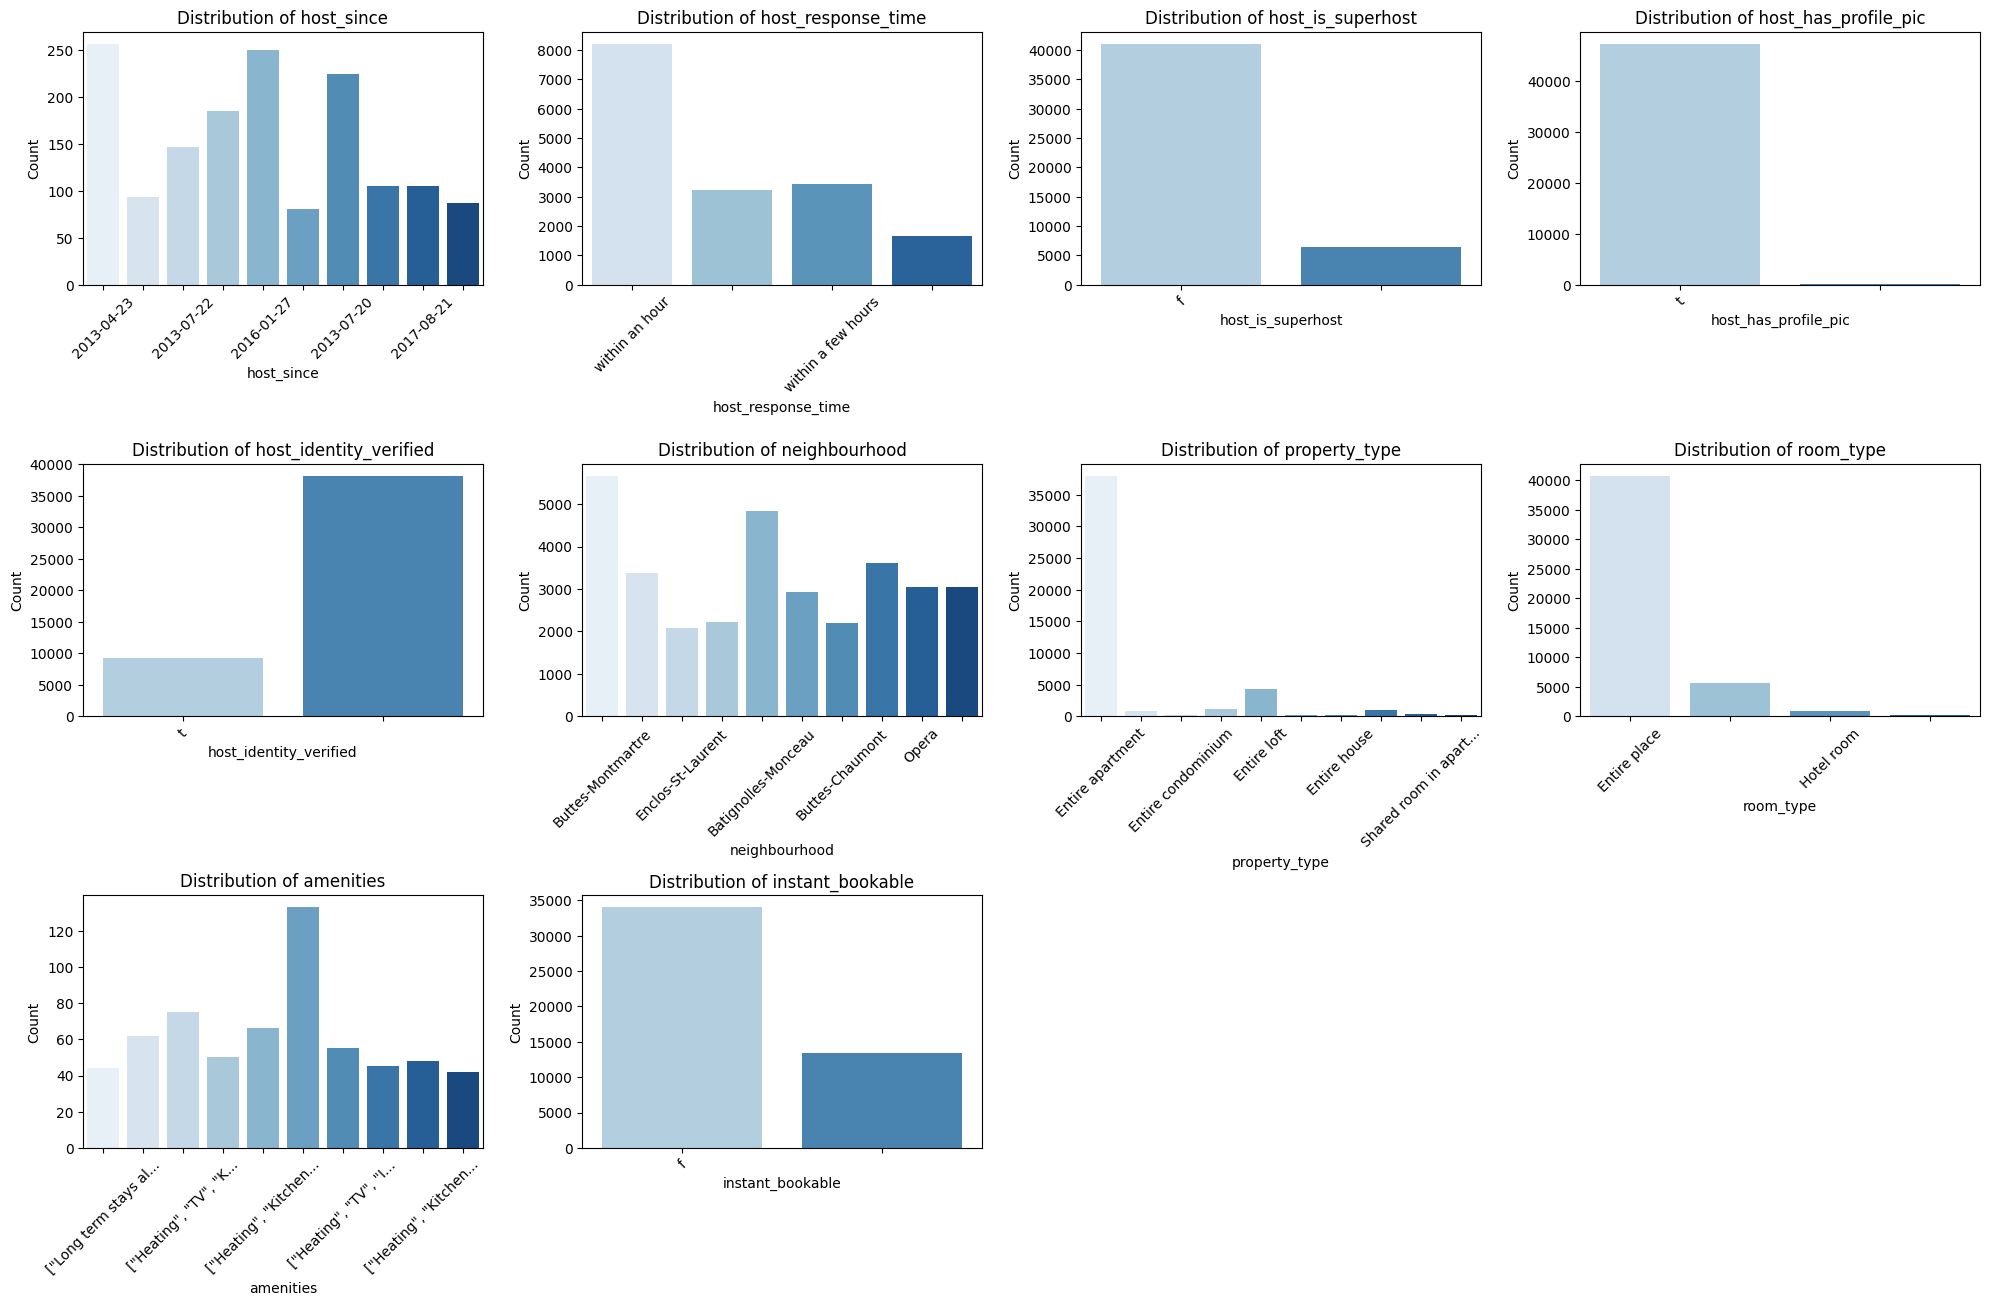

In [10]:

def visualize_categorical_distributions(df, categorical_features, top_n=10):
    num_features = len(categorical_features)
    grid_size = math.ceil(math.sqrt(num_features))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(5 * grid_size, 4 * grid_size))
    axes = axes.flatten()

    for i, column_name in enumerate(categorical_features):
        if column_name not in df.columns:
            continue

        value_counts = df[column_name].value_counts().head(top_n)
        filtered_df = df[df[column_name].isin(value_counts.index)]

        short_labels = [str(val)[:20] + "..." if len(str(val)) > 23 else val for val in value_counts.index]

        sns.countplot(x=column_name, hue=column_name, data=filtered_df, ax=axes[i], palette="Blues", legend=False)
        
        axes[i].set_title(f'Distribution of {column_name}')
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel("Count")
        axes[i].set_xticks(range(len(short_labels)))
        axes[i].set_xticklabels(short_labels, rotation=45)

        for idx, label in enumerate(axes[i].get_xticklabels()):
            if idx % 2 != 0:
                label.set_visible(False)

    for j in range(i + 1, grid_size * grid_size):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualize_categorical_distributions(listings, categorical_features)


## 2.5. Analysis of Target

In [11]:
print("Mean price:", listings['price'].mean())
print("Standard deviation of price:", listings['price'].std())

Mean price: 110.78800455043398
Standard deviation of price: 199.87576226831183


# 3. Pipeline


In [12]:
# Basic logger configuration
logging.basicConfig(level=logging.INFO)


## 3.1. Data Cleaning


In [14]:
import pandas as pd
import logging

# 1. Change data types (booleans, dates, integers)
def change_data_types(df):
    bool_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].map({'t': True, 'f': False}).astype('boolean')
    df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
    df['bedrooms'] = df['bedrooms'].astype('Int64')
    return df

# 2. Remove irrelevant columns
def remove_irrelevant_columns(df):
    cols_to_drop = ['city', 'host_location', 'district', 'name']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')
    return df


In [15]:
# Final combined data cleaning function
def data_cleaning_beforesplit(df, target_col='price'):
    logging.info("Starting data cleaning...")
    df = remove_irrelevant_columns(df)
    df = change_data_types(df)
    logging.info(f"Data cleaned, current shape: {df.shape}")
    return df

In [16]:
def handle_missing_values(X_train, X_val, y_train, y_val,
                             numerical_features, categorical_features, boolean_features):
    # Preenche missing numéricos com mediana do train
    for col in numerical_features:
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        if col in X_val.columns:
            X_val[col] = X_val[col].fillna(median_val)

    # Preenche missing em booleanos e categóricos com moda do train
    for col in boolean_features + categorical_features:
        mode_val = X_train[col].mode(dropna=True)
        if not mode_val.empty:
            mode_val = mode_val[0]
            X_train[col] = X_train[col].fillna(mode_val)
            if col in X_val.columns:
                X_val[col] = X_val[col].fillna(mode_val)

    median_y = y_train.median() 
    if y_train.isnull().any():
        y_train = y_train.fillna(median_y)

    if y_val.isnull().any():
        y_val = y_val.fillna(median_y)
        
    return X_train, X_val, y_train, y_val



def handle_outliers(df, numerical_features = numerical_features, factor=1.5):
    for col in numerical_features:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df


In [17]:
def data_cleaning_aftersplit(X_train, X_val, y_train, y_val):
    numerical_features, categorical_features, boolean_features, _ = identify_data_types(X_train)

    logging.info("Starting data cleaning...")
    X_train, X_val, y_train, y_val = handle_missing_values(
        X_train, X_val, y_train, y_val,
        numerical_features, categorical_features, boolean_features
    )
    X_train = handle_outliers(X_train, numerical_features)

    return X_train, X_val, y_train, y_val


## 3.2. Feature Engineering

In [18]:
def get_top_amenities(df, top_n=3):
    # Extract all amenities from listings into one big list
    all_amenities = []
    for item in df['amenities'].dropna():
        try:
            amenities_list = ast.literal_eval(item)
            all_amenities.extend(amenities_list)
        except:
            continue

    # Count frequencies
    amenity_counts = Counter(all_amenities)
    top_overall = [amenity for amenity, count in amenity_counts.most_common(top_n)]

    return top_overall

def feature_engineering(df):
    logging.info("Creating features...")

    # Get top amenities lists
    top_overall = get_top_amenities(df)
    #logging.info(f"Top overall amenities: {top_overall}")

    # Create binary columns for top amenities dynamically
    def has_amenity(amenity_list, amenity):
        if pd.isnull(amenity_list):
            return False
        try:
            amenities = ast.literal_eval(amenity_list)
            return amenity in amenities
        except:
            return False

    created_features = []

    for amenity in top_overall:
        col_name = f'has_{amenity.lower().replace(" ", "_")}'
        df[col_name] = df['amenities'].apply(lambda x: has_amenity(x, amenity))
        created_features.append(col_name)

    # Count number of amenities
    df['n_amenities'] = df['amenities'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
    created_features.append('n_amenities')

    # Convert 'host_since' to number of days since latest date
    if 'host_since' in df.columns:
        df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
        last_date = df['host_since'].max()
        df['host_since_days'] = (last_date - df['host_since']).dt.days
        df = df.drop(columns=['host_since'])
        created_features.append('host_since_days')


    # Create price per bedroom if possible
    if 'price' in df.columns and 'bedrooms' in df.columns:
        df['price_per_bedroom'] = df.apply(
            lambda row: row['price'] / row['bedrooms'] if pd.notna(row['bedrooms']) and row['bedrooms'] > 0 else np.nan,
            axis=1
        )

        created_features.append('price_per_bedroom')

    # Interaction: superhost * number_of_reviews
    if 'host_is_superhost' in df.columns and 'number_of_reviews' in df.columns:
        df['superhost_x_reviews'] = df['host_is_superhost'].map({'t':1, 'f':0}) * df['number_of_reviews']
        created_features.append('superhost_x_reviews')

    # Days since last review
    if 'last_review' in df.columns:
        last_review_date = df['last_review'].max()
        df['days_since_last_review'] = (last_review_date - df['last_review']).dt.days
        created_features.append('days_since_last_review')

    logging.info(f"Features created: {created_features}")

    return df


## 3.3. Encoding


In [19]:
# Categorical variable encoding
def encode_categorical(X_train, X_val):
    le_dict = {}
    for col in X_train.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_val[col] = X_val[col].astype(str)
        X_val[col] = X_val[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
        le_dict[col] = le
    return X_train, X_val

## 3.4. Scalling

In [20]:
def scale_numeric(X_train, X_val):
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
    return X_train, X_val, scaler

## 3.5. Feature Selection


## 3.6. split data

In [21]:
# 5. Train-Test Split + Scaling + Imputation
def split_data(df, target_col='price'):
    logging.info("Splitting data into train and val...")
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_val, y_train, y_val


## 3.7. Train Model

In [22]:
# 5. Model Training + MLflow tracking
def train_model(X_train, y_train):
    logging.info("Training LinearRegression...")
    mlflow.start_run()
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Previsões no treino
    train_preds = model.predict(X_train)
    
    # Calcular métricas no treino
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    
    logging.info(f"Train MAE: {train_mae:.2f}")
    logging.info(f"Train RMSE: {train_rmse:.2f}")
    
    # Logar métricas no MLflow
    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("train_rmse", train_rmse)
    
    mlflow.sklearn.log_model(model, name="linear_regression_model", input_example=X_train.iloc[:5])
    mlflow.end_run()
    
    return model



## 3.8. Evaluation

In [23]:

# 6. Evaluation and Explainability

def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    
    logging.info(f"MAE: {mae:.2f}")
    logging.info(f"RMSE: {rmse:.2f}")
    
    # SHAP explicabilidade (pode ser pesado)
    # Cuidado com modelos lineares — SHAP não é sempre necessário
    return mae, rmse

## 3.9 Pipeline Usage

In [24]:
# Full pipeline
def pipeline(df, target_col):
    
    df_clean = data_cleaning_beforesplit(df)
    df_feat = feature_engineering(df_clean)
    X_train, X_val, y_train, y_val = split_data(df_feat, target_col)

    X_train, X_val, y_train, y_val = data_cleaning_aftersplit(X_train, X_val, y_train, y_val) 
    X_train, X_val = encode_categorical(X_train, X_val)
    X_train, X_val, _ = scale_numeric(X_train, X_val)
    
    model = train_model(X_train, y_train)
    mae, rmse = evaluate_model(model, X_val, y_val)
    
    return model, mae, rmse

# Example usage (assuming your dataframe is called 'listings' and target is 'price')
model, mae, rmse = pipeline(listings, target_col='price')

INFO:root:Starting data cleaning...
INFO:root:Data cleaned, current shape: (47468, 29)
INFO:root:Creating features...
INFO:root:Features created: ['has_heating', 'has_wifi', 'has_kitchen', 'n_amenities', 'host_since_days', 'price_per_bedroom']
INFO:root:Splitting data into train and val...
INFO:root:Starting data cleaning...
INFO:root:Training LinearRegression...
INFO:root:Train MAE: 47.02
INFO:root:Train RMSE: 192.00
INFO:root:MAE: 97.62
INFO:root:RMSE: 285.99
